<h1>Импорт библиотек

In [46]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [70]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    result = np.zeros_like(V[0])  # Инициализация результата
    for i in range(len(X)):
        result += X[i] @ V[i]  # Умножаем матрицу на вектор и добавляем к результату
    return result

# Тестирование функции
def test_sum_prod():
    # Генерация случайных матриц и векторов
    n = 3  # Размерность матрицы и вектора
    p = 5  # Количество матриц и векторов

    X = [np.random.rand(n, n) for _ in range(p)]  # Список случайных матриц
    V = [np.random.rand(n, 1) for _ in range(p)]  # Список случайных векторов

    # Вычисление результата
    result = sum_prod(X, V)
    print("Результат суммы произведений матриц на векторы:")
    print(result)

# Запуск тестов
test_sum_prod()


Результат суммы произведений матриц на векторы:
[[6.14970795]
 [5.98199667]
 [4.85627779]]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [68]:
def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)  # Преобразуем булев массив в int (0 или 1)

# Тестирование функции
def test_binarize():
    # Пример матрицы
    M = np.array([[0.1, 0.6, 0.8], [0.4, 0.3, 0.9], [0.2, 0.7, 0.5]])
    
    # Применяем бинаризацию с порогом 0.5
    binarized_M = binarize(M, threshold=0.5)
    
    print("Исходная матрица:")
    print(M)
    print("Бинаризованная матрица:")
    print(binarized_M)
    
    # Тест с другим порогом
    binarized_M_0_3 = binarize(M, threshold=0.3)
    print("Бинаризованная матрица с порогом 0.3:")
    print(binarized_M_0_3)

# Запуск тестов
test_binarize()


Исходная матрица:
[[0.1 0.6 0.8]
 [0.4 0.3 0.9]
 [0.2 0.7 0.5]]
Бинаризованная матрица:
[[0 1 1]
 [0 0 1]
 [0 1 0]]
Бинаризованная матрица с порогом 0.3:
[[0 1 1]
 [1 0 1]
 [0 1 1]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [67]:
def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(mat[:, col]) for col in range(mat.shape[1])]

# Тестирование функций
def test_unique():
    # Пример матрицы
    mat = np.array([[1, 2, 3, 1], [4, 5, 2, 3], [6, 7, 8, 2], [1, 3, 4, 1]])
    
    # Получаем уникальные элементы по строкам
    rows_unique = unique_rows(mat)
    print("Уникальные элементы по строкам:")
    for i, row in enumerate(rows_unique):
        print(f"Строка {i + 1}: {row}")
    
    # Получаем уникальные элементы по столбцам
    cols_unique = unique_columns(mat)
    print("\nУникальные элементы по столбцам:")
    for i, col in enumerate(cols_unique):
        print(f"Столбец {i + 1}: {col}")

# Запуск тестов
test_unique()


Уникальные элементы по строкам:
Строка 1: [1 2 3]
Строка 2: [2 3 4 5]
Строка 3: [2 6 7 8]
Строка 4: [1 3 4]

Уникальные элементы по столбцам:
Столбец 1: [1 4 6]
Столбец 2: [2 3 5 7]
Столбец 3: [2 3 4 8]
Столбец 4: [1 2 3]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

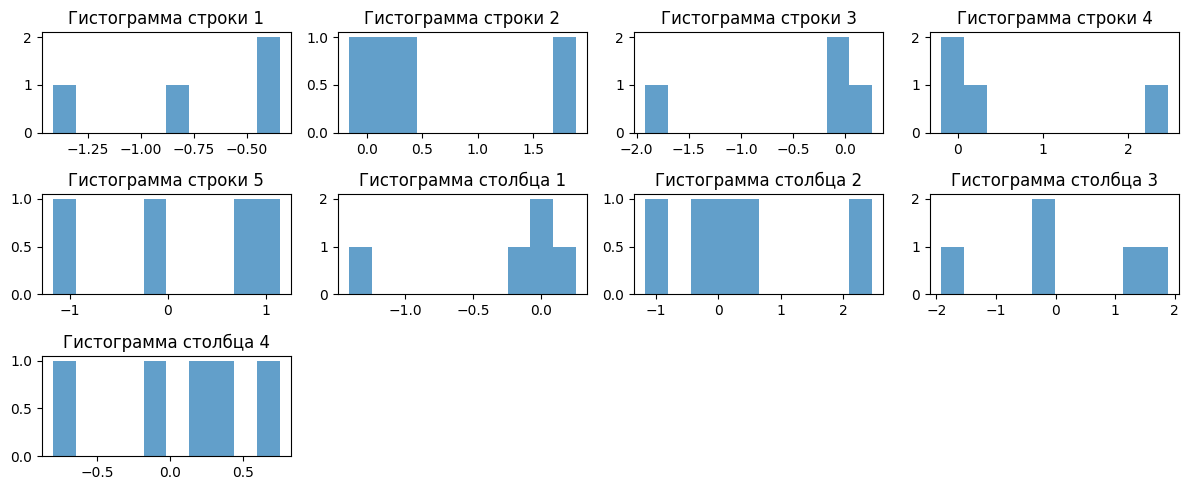

Математическое ожидание для каждой строки: [-0.74525196  0.57588221 -0.44054515  0.65816467  0.17284151]
Дисперсия для каждой строки: [0.17992923 0.61272089 0.74448506 1.11659999 0.77974095]
Математическое ожидание для каждого столбца: [-0.25871752  0.24070474  0.1150324   0.07985341]
Дисперсия для каждого столбца: [0.35315568 1.4978836  1.72674359 0.25985609]


In [66]:
def generate_matrix_and_statistics(m, n):
    # Генерация случайной матрицы с нормальным распределением
    matrix = np.random.randn(m, n)
    
    # Вычисление математического ожидания и дисперсии для каждой строки и столбца
    row_means = np.mean(matrix, axis=1)
    row_variances = np.var(matrix, axis=1)
    
    col_means = np.mean(matrix, axis=0)
    col_variances = np.var(matrix, axis=0)
    
    # Построение гистограмм для каждой строки
    plt.figure(figsize=(12, 8))
    for i in range(m):
        plt.subplot(m, n, i + 1)
        plt.hist(matrix[i], bins=10, alpha=0.7)
        plt.title(f'Гистограмма строки {i+1}')
    
    # Построение гистограмм для каждого столбца
    for j in range(n):
        plt.subplot(m, n, m + j + 1)
        plt.hist(matrix[:, j], bins=10, alpha=0.7)
        plt.title(f'Гистограмма столбца {j+1}')
    
    plt.tight_layout()
    plt.show()

    # Возвращаем статистику
    return {
        'row_means': row_means,
        'row_variances': row_variances,
        'col_means': col_means,
        'col_variances': col_variances
    }

# Тестирование функции
def test_generate_matrix_and_statistics():
    m, n = 5, 4  # Размеры матрицы
    stats = generate_matrix_and_statistics(m, n)
    
    print("Математическое ожидание для каждой строки:", stats['row_means'])
    print("Дисперсия для каждой строки:", stats['row_variances'])
    print("Математическое ожидание для каждого столбца:", stats['col_means'])
    print("Дисперсия для каждого столбца:", stats['col_variances'])

# Запуск тестов
test_generate_matrix_and_statistics()


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [65]:
def chess(m, n, a, b):
    # Создаем пустую матрицу
    matrix = np.zeros((m, n), dtype=int)
    
    # Заполняем матрицу числами a и b в шахматном порядке
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
                
    return matrix

# Тестирование функции
def test_chess():
    m, n = 5, 6  # Размеры матрицы
    a, b = 1, 0  # Числа для чёрных и белых клеток
    
    # Генерируем шахматную матрицу
    result = chess(m, n, a, b)
    
    print("Шахматная матрица:")
    print(result)
    
    # Дополнительный тест
    m, n = 4, 4
    a, b = 2, 3
    result2 = chess(m, n, a, b)
    
    print("\nШахматная матрица для другого теста:")
    print(result2)

# Запуск тестов
test_chess()


Шахматная матрица:
[[1 0 1 0 1 0]
 [0 1 0 1 0 1]
 [1 0 1 0 1 0]
 [0 1 0 1 0 1]
 [1 0 1 0 1 0]]

Шахматная матрица для другого теста:
[[2 3 2 3]
 [3 2 3 2]
 [2 3 2 3]
 [3 2 3 2]]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$


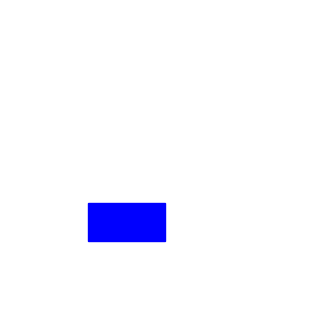

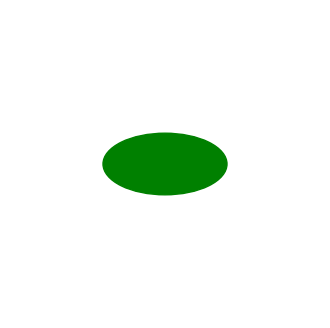

In [64]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    fig, ax = plt.subplots(figsize=(n/100, m/100))
    ax.set_xlim(0, n)
    ax.set_ylim(0, m)
    
    # Заполняем фон
    ax.set_facecolor(background_color)
    
    # Добавляем прямоугольник
    rectangle = patches.Rectangle((n/4, m/4), a, b, linewidth=1, edgecolor=rectangle_color, facecolor=rectangle_color)
    ax.add_patch(rectangle)
    
    # Отключаем оси
    ax.axis('off')
    
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    fig, ax = plt.subplots(figsize=(n/100, m/100))
    ax.set_xlim(0, n)
    ax.set_ylim(0, m)
    
    # Заполняем фон
    ax.set_facecolor(background_color)
    
    # Добавляем овал
    ellipse = patches.Ellipse((n/2, m/2), 2*a, 2*b, linewidth=1, edgecolor=ellipse_color, facecolor=ellipse_color)
    ax.add_patch(ellipse)
    
    # Отключаем оси
    ax.axis('off')
    
    plt.show()

# Тестирование функций
def test_draw_shapes():
    # Тест 1: Рисуем прямоугольник
    draw_rectangle(100, 50, 400, 400, 'blue', 'lightgray')
    
    # Тест 2: Рисуем овал
    draw_ellipse(80, 40, 400, 400, 'green', 'lightyellow')

# Запуск тестов
test_draw_shapes()


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

Математическое ожидание: -6.405182462570341
Дисперсия: 21.35105153940793
СКО: 4.620719807498387
Локальные максимумы (индексы): [3, 7, 9, 12, 17, 20, 22, 25, 27, 31, 34, 36, 41, 48, 50, 55, 59, 65, 68, 71, 73, 76, 78, 82, 87, 91, 98]
Локальные минимумы (индексы): [1, 5, 8, 11, 16, 19, 21, 24, 26, 30, 33, 35, 38, 46, 49, 52, 57, 63, 66, 69, 72, 74, 77, 80, 85, 88, 95]


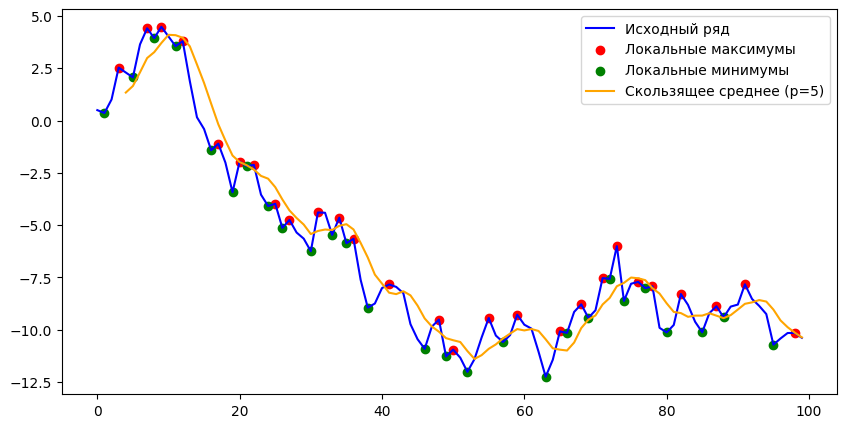

In [63]:
def analyze_time_series(series, p):
    """Анализ временного ряда: математическое ожидание, дисперсия, СКО, локальные экстремумы, скользящее среднее."""
    mean = np.mean(series)
    variance = np.var(series)
    std_dev = np.std(series)
    
    local_maxima = [i for i in range(1, len(series) - 1) if series[i] > series[i - 1] and series[i] > series[i + 1]]
    local_minima = [i for i in range(1, len(series) - 1) if series[i] < series[i - 1] and series[i] < series[i + 1]]
    
    moving_avg = np.convolve(series, np.ones(p)/p, mode='valid')
    
    return mean, variance, std_dev, local_maxima, local_minima, moving_avg

def plot_series(series, local_maxima, local_minima, moving_avg, p):
    """Визуализация временного ряда, локальных экстремумов и скользящего среднего."""
    plt.figure(figsize=(10, 5))
    plt.plot(series, label='Исходный ряд', color='blue')
    plt.scatter(local_maxima, [series[i] for i in local_maxima], color='red', label='Локальные максимумы')
    plt.scatter(local_minima, [series[i] for i in local_minima], color='green', label='Локальные минимумы')
    plt.plot(range(p - 1, len(series)), moving_avg, label=f'Скользящее среднее (p={p})', color='orange')
    plt.legend()
    plt.show()
    
# Тестирование кода
np.random.seed(42)
time_series = np.random.randn(100).cumsum()  # Генерация случайного временного ряда
p = 5  # Размер окна для скользящего среднего

mean, variance, std_dev, local_maxima, local_minima, moving_avg = analyze_time_series(time_series, p)

print(f"Математическое ожидание: {mean}")
print(f"Дисперсия: {variance}")
print(f"СКО: {std_dev}")
print(f"Локальные максимумы (индексы): {local_maxima}")
print(f"Локальные минимумы (индексы): {local_minima}")

plot_series(time_series, local_maxima, local_minima, moving_avg, p)

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [61]:
def one_hot_encoding(labels):
    # Находим количество классов (максимальное значение метки + 1)
    num_classes = np.max(labels) + 1
    
    # Создаем пустую матрицу для one-hot encoding
    one_hot_matrix = np.zeros((len(labels), num_classes), dtype=int)
    
    # Заполняем матрицу: в соответствующей позиции ставим 1
    for i, label in enumerate(labels):
        one_hot_matrix[i, label] = 1
        
    return one_hot_matrix

# Тестирование функции
def test_one_hot_encoding():
    labels = np.array([0, 2, 3, 0])  # Пример вектора меток
    one_hot_matrix = one_hot_encoding(labels)
    print("One-hot encoding:")
    print(one_hot_matrix)

# Запуск тестов
test_one_hot_encoding()


One-hot encoding:
[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
